In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [3]:
df=pd.read_csv("/content/emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,Email 3815,0,3,2,0,2,0,15,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3815,Email 3816,2,0,1,0,1,0,10,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3816,Email 3817,19,22,30,1,7,1,138,4,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3817,Email 3818,5,6,1,4,4,2,34,4,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
df_clean=df.drop(columns=["Email No."])
df_clean

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,13,24,6,6,2,102,1,27,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,1,0,0,0,8,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,5,22,0,5,1,51,2,10,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,6,17,1,5,2,57,0,9,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3814,0,3,2,0,2,0,15,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3815,2,0,1,0,1,0,10,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3816,19,22,30,1,7,1,138,4,14,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3817,5,6,1,4,4,2,34,4,0,14,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
df_clean.isnull().sum()

,0
the,0
to,0
ect,0
and,0
for,0
...,...
military,1
allowing,1
ff,1
dry,1


In [8]:
df_clean.dropna(inplace=True)
df_clean.isnull().sum()

,0
the,0
to,0
ect,0
and,0
for,0
...,...
military,0
allowing,0
ff,0
dry,0


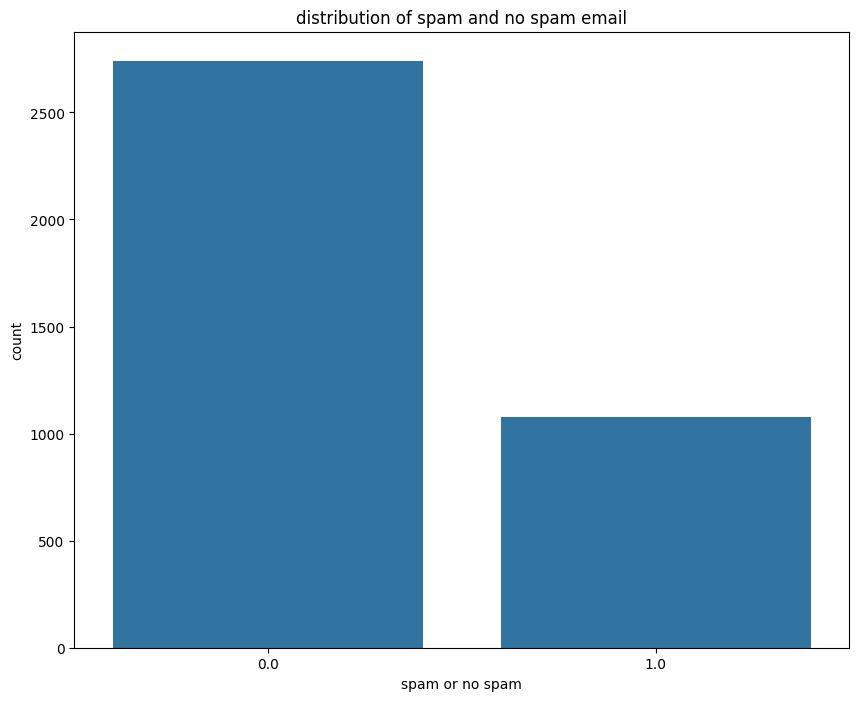

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(x='Prediction',data=df_clean)
plt.title("distribution of spam and no spam email")
plt.xlabel("spam or no spam")
plt.ylabel("count")
plt.show()

In [17]:
x=df_clean.drop(columns=['Prediction'])
y=df_clean['Prediction']
y

,Prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3813,1.0
3814,0.0
3815,0.0
3816,0.0


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
nb=MultinomialNB()
nb.fit(x_train,y_train)


MultinomialNB()

In [21]:
y_pred_nb=nb.predict(x_test)
y_pred_nb

array([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0.

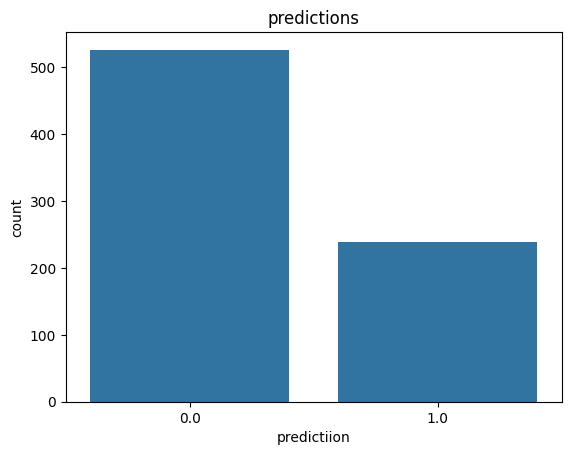

In [22]:
sns.countplot(x=y_pred_nb)
plt.title("predictions")
plt.xlabel("predictiion")
plt.ylabel("count")
plt.show()

In [25]:
nb_acc=accuracy_score(y_test,y_pred_nb)
print(nb_acc)

0.9568062827225131


In [24]:
nb_class=classification_report(y_test,y_pred_nb)
print(nb_class)

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       543
         1.0       0.89      0.96      0.93       221

    accuracy                           0.96       764
   macro avg       0.94      0.96      0.95       764
weighted avg       0.96      0.96      0.96       764



In [26]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [27]:
y_pred_svm=svm.predict(x_test)
y_pred_svm

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

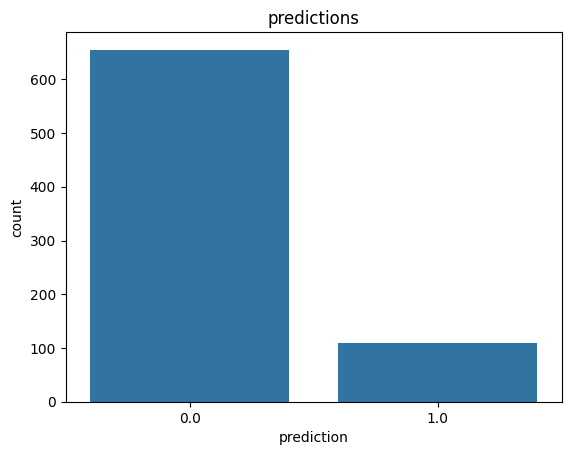

In [28]:
sns.countplot(x=y_pred_svm)
plt.title("predictions")
plt.xlabel("prediction")
plt.ylabel("count")
plt.show()

In [29]:
svm_acc=accuracy_score(y_test,y_pred_svm)
print(svm_acc)

0.8219895287958116


In [31]:
svm_class=classification_report(y_test,y_pred_svm)
print(svm_class)

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       543
         1.0       0.89      0.44      0.59       221

    accuracy                           0.82       764
   macro avg       0.85      0.71      0.74       764
weighted avg       0.83      0.82      0.80       764



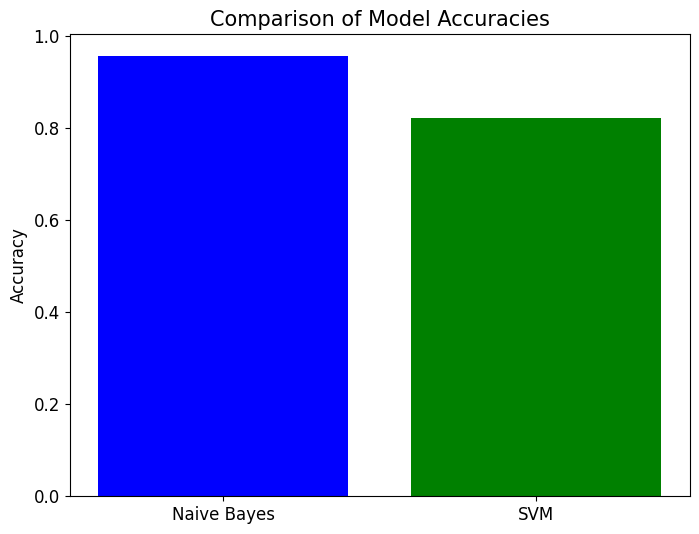

In [34]:
models = ['Naive Bayes', 'SVM']
accuracies = [nb_acc, svm_acc]
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Comparison of Model Accuracies', fontsize=15)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()